In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from context import BIP_LWR

from BIP_LWR.tools.vis import mcmc_vis_tools
from BIP_LWR.tools.vis.vis_util import plot_LWR_xt
from BIP_LWR.lwr.lwr_solver import LWR_Solver

from BIP_LWR.tools.vis.acf import my_plot_acf

# Del Castillo - FD sampling only

Analyse MCMC chain that samples FD only using a Metropolis sampler with Gaussian proposal

In [2]:
paths_hdf5 = mcmc_vis_tools.list_paths(base_path="../../../Analysis/FD_only_sampling/")

../../Analysis/FD_only_sampling/MCMC_outputs/run_1


In [3]:
paths = paths_hdf5[0]
mcmc_vis = mcmc_vis_tools.MCMC_vis(data_directory=paths)
# mcmc_vis.move
print("====\n")

mcmc_vis.print_chain_info()

print("{} chains\n----".format(len(mcmc_vis.d_samples)))
print("Number of samples per chain:")
for elem in mcmc_vis.d_samples.values():
    print(len(elem))
    

2019-12-11 17:32:27,753 INFO CLAW: NumExpr defaulting to 8 threads.
Number of MCMC chains: 1
Total number of samples: 6
Samples are taken from ['z', 'rho_j', 'u', 'w', 'param_accept', 'BC_Gibbs']

Data directory: ../../../Analysis/FD_only_sampling/MCMC_outputs/run_1
====

FD_only_sampling-Run_1
------
{'flow': 'data_array_70108_flow_49t.csv', 'density': 'data_array_70108_density_49t.csv'}
------
Upload to S3: False
------
Comments: FD only sampling
------
Step save: 1
------


1 chains
----
Number of samples per chain:
6


In [4]:


plt.rcParams.update({'font.size': 16})

In [5]:
# Dataframe of samples for chain 1
mcmc_vis.d_samples['MCMC_1']

,z,rho_j,u,w,log_post,param_accept,BC_Gibbs
0,179.432053,451.616350,2.872091,0.133478,-3358.039586,IC,IC
1,179.722211,450.844191,2.802140,0.130102,-3357.254883,FD_a,IC
2,179.722211,450.844191,2.802140,0.130102,-3357.254883,FD_r,IC
3,179.722211,450.844191,2.802140,0.130102,-3357.254883,FD_r,IC
4,179.722211,450.844191,2.802140,0.130102,-3357.254883,FD_r,IC
5,179.722211,450.844191,2.802140,0.130102,-3357.254883,FD_r,IC


FD_only_sampling-Run_1
------
{'flow': 'data_array_70108_flow_49t.csv', 'density': 'data_array_70108_density_49t.csv'}
------
Upload to S3: False
------
Comments: FD only sampling
------
Step save: 1
------


Random scan Gibbs sampler for FD and BCs:
-----------------------------------------
    FD move:
        probability of selecting move: 1
        Random walk for FD parameters using a Gaussian proposal
        Truncated Gaussian proposal for w (ie: reject straight away if w<=0)

    Joint FD & BC move:
        probability of selecting move: 0
        Propose a new FD and update BCs using a deterministic function

    BC move:
        probability of selecting move: 0
        Gibbs sampling using blocks:
            section_1: {'param': 'BC_inlet', 'cut1': 0, 'cut2': 1, 'omega': 1}
        
None
FD covariance:
[[ 1.46565905 -0.43494473 -0.04680924  0.00179531]
 [-0.43494473  5.61913019  0.01936478 -0.0128512 ]
 [-0.04680924  0.01936478  0.00575797  0.00036424]
 [ 0.00179531 -0.01285

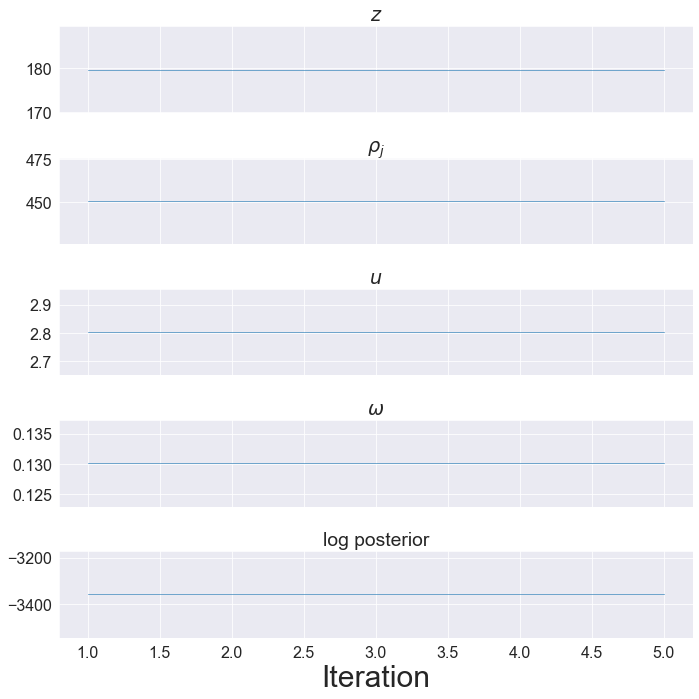

In [6]:
chain_list = [1,3,4,6,7]

mcmc_vis.print_chain_info()
print(mcmc_vis.move)
print("FD covariance:\n{}".format(mcmc_vis.cov))
fig, ax = mcmc_vis.trace_plot(chains=chain_list, log_post_lim=-9999999, burnin=0, step=1, pt_size=1, figsize=(25, 19))
#                    title_save="DelCastSim_FDonly-traceplots.png")


ax[0].set_title(r"$z$")
ax[1].set_title(r"$\rho_j$")
ax[2].set_title(r"$u$")
ax[3].set_title(r"$\omega$")
ax[4].set_title(r"log posterior")
plt.tight_layout()
# plt.savefig("figures/delCast_DS1_FDBC-CorrPT.png")

In [7]:
df_all = mcmc_vis.concat_chains(chains=[1,2,3,4], params=['rho_j','u','w','z'])
df_all_mean = df_all.mean()

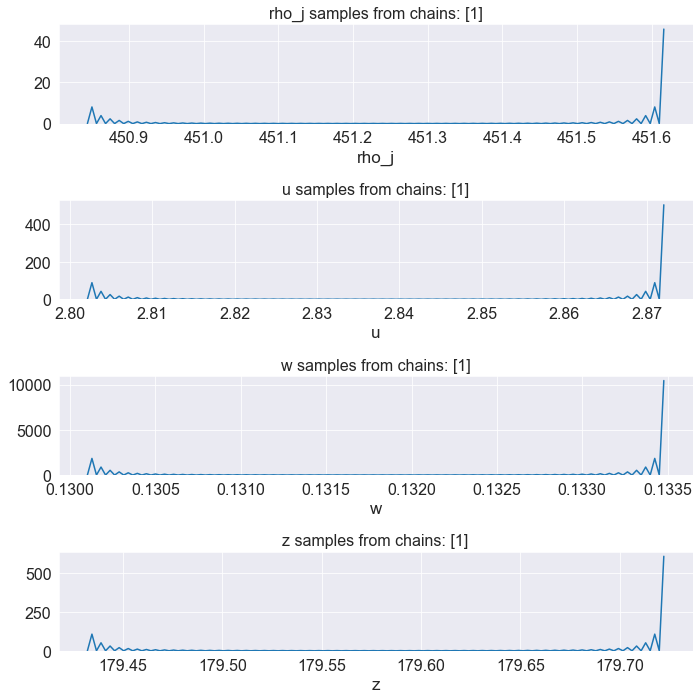

In [8]:
mcmc_vis.kdeplot(params=['rho_j','u','w','z'])

In [9]:
chain_num = 1
burnin = 0

print("MSEJD: {:.4f}\n".format(mcmc_vis.MSEJD(chains=[chain_num], burnin=burnin)))

mcmc_vis.acceptance_rate(param_type='FD',chains=[chain_num], burnin=burnin)
print("\n---")


for par in ['z','rho_j','u','w']:
    print("R_hat for {}: {:.3f}".format(par, mcmc_vis.R_hat(param=par)))
print("\n----")


MSEJD: 0.1371

Acceptance rate for FD parameter: 20.000%

---
R_hat for z: 1.000
R_hat for rho_j: 1.000
R_hat for u: 1.000
R_hat for w: 1.000

----


In [10]:

plt.rcParams.update({'font.size': 20})

Number of lags for thinned chain: 3


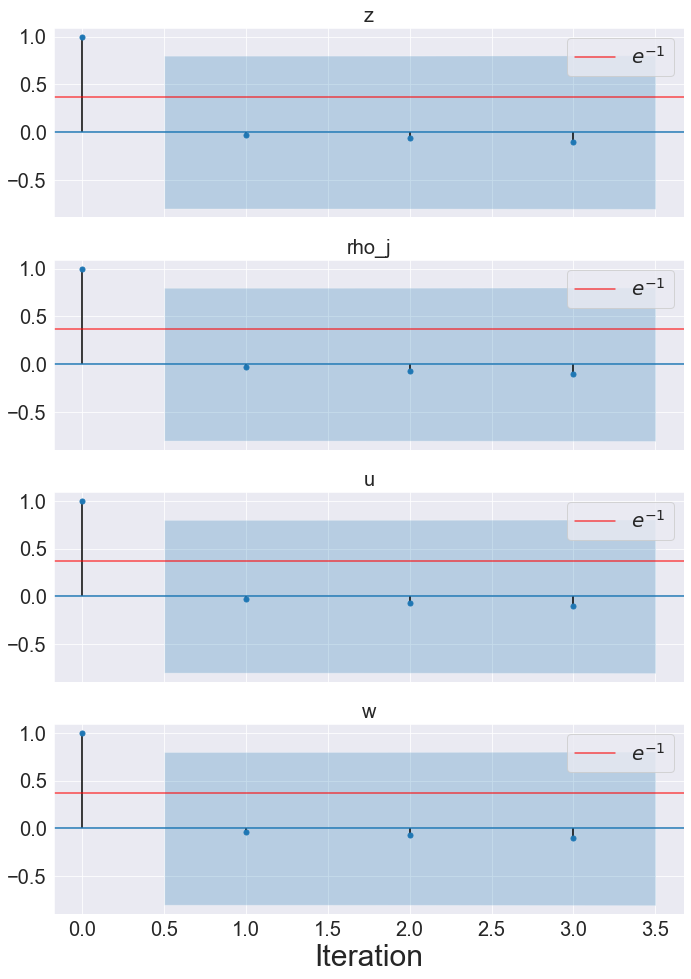

In [11]:
chain_num = 1
lags = 3

lag_list = np.linspace(0, lags, int(lags/mcmc_vis.step_save)+1)

# ========
lags = int(lags/mcmc_vis.step_save)
print("Number of lags for thinned chain: {}".format(lags))
df = mcmc_vis.d_samples['MCMC_{}'.format(chain_num)]


fig, acf_ax = plt.subplots(4, figsize=(10, 14), sharex=True)
    
for idx, par in enumerate(['z', 'rho_j','u','w']):
    my_plot_acf(df[par], lags=lags, lag_list=lag_list, ax=acf_ax[idx])
#     acf_ax.set_xlim(1.5)
    # sns.despine()
    plt.tight_layout()
    acf_ax[idx].set_title(par, size=20)
acf_ax[-1].set_xlabel("Iteration", size=30)
plt.tight_layout()
acf_ax[0].axhline(0.37, alpha=0.7,c='r', label=r'$e^{-1}$')
acf_ax[1].axhline(0.37, alpha=0.7,c='r', label=r'$e^{-1}$')
acf_ax[2].axhline(0.37, alpha=0.7,c='r', label=r'$e^{-1}$')
acf_ax[3].axhline(0.37, alpha=0.7,c='r', label=r'$e^{-1}$')
for idx in range(0,4):
    acf_ax[idx].legend()

    # plt.savefig("delCast_DS1_FDBC-ACF-CorrPTsampler-FDs_xaxis30K.png")

In [12]:

plt.rcParams.update({'font.size': 15})

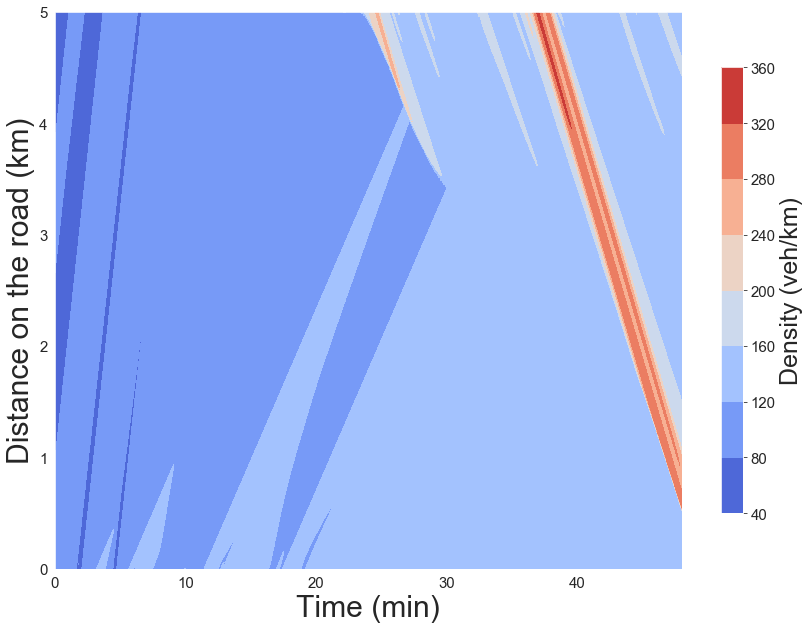

In [13]:
config_dict = {'my_analysis_dir': '2018/June2_2018-New_dataset',
                'run_num': 1,
                'data_array_dict':
                        {'flow': 'data_array_70108_flow_49t.csv',
                        'density': 'data_array_70108_density_49t.csv'},
               'ratio_times_BCs': 40,
                      }
LWR = LWR_Solver(config_dict=config_dict)


df_mean = mcmc_vis.concat_chains(params=['z', 'rho_j','u','w'], burnin=0).mean()

FD = df_mean.to_dict()
FD['solver'] = 'lwr_del_Cast'
FD['w'] = 1/FD['w']

FD['BC_outlet'] = LWR.high_res_BCs("BC_outlet")
FD['BC_inlet'] = LWR.high_res_BCs("BC_inlet")


title_save = None
# title_save = "DelCastSim_TRUE_PARAMS-XT_density.png"


plot_LWR_xt(FD=FD, data_variable='density', config_dict=config_dict,
           out_times=np.linspace(0,40*LWR.final_time, 1200), title_save=title_save)